# Imports

In [ ]:
!pip install statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import time
import plotly.express as px
from scipy.stats._stats import _kendall_dis
import warnings
from statsmodels.tools.eval_measures import bic
from statsmodels.tools.eval_measures import aic
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
data = pd.read_csv("Database Politics France R9.csv")

     |████████████████████████████████| 9.8 MB 15.0 MB/s 
     |████████████████████████████████| 233 kB 49.6 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


---
# Data discovery

We start by making sense of the data available in our dataset

In [ ]:
data.head()

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,imueclt,imwbcnt,pstplonl,hmsfmlsh,hmsacld,prtvtfr,prtvtafr,prtvtbfr,prtvtcfr,prtvtdfr
0,FR,ESS1-9e01,1.0,10.12.2020,181658,ESS9e03,9,3,23,1.119029,...,7,7,2,5,1,NaN,NaN,NaN,NaN,5
1,FR,ESS1-9e01,1.0,10.12.2020,181659,ESS9e03,9,3,41,0.537166,...,5,6,1,5,5,NaN,NaN,NaN,NaN,9
2,FR,ESS1-9e01,1.0,10.12.2020,181660,ESS9e03,9,3,53,1.712321,...,8,6,2,5,3,NaN,NaN,NaN,NaN,77
3,FR,ESS1-9e01,1.0,10.12.2020,181661,ESS9e03,9,3,83,1.036066,...,0,8,2,5,1,NaN,NaN,NaN,NaN,66
4,FR,ESS1-9e01,1.0,10.12.2020,181662,ESS9e03,9,3,98,0.566907,...,8,5,2,5,1,NaN,NaN,NaN,NaN,66


In [ ]:
data.isna().describe()

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,imueclt,imwbcnt,pstplonl,hmsfmlsh,hmsacld,prtvtfr,prtvtafr,prtvtbfr,prtvtcfr,prtvtdfr
count,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,...,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010
unique,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,True,False
freq,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,...,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010


In [ ]:
# Some columns do not have any data
data_no_na = data.dropna(axis=1)

In [ ]:
data_no_na.head(10)

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,pstplonl,hmsfmlsh,hmsacld,prtvtdfr
0,FR,ESS1-9e01,1.0,10.12.2020,181658,ESS9e03,9,3,23,1.119029,...,2,2,2,7,7,7,2,5,1,5
1,FR,ESS1-9e01,1.0,10.12.2020,181659,ESS9e03,9,3,41,0.537166,...,2,3,3,5,5,6,1,5,5,9
2,FR,ESS1-9e01,1.0,10.12.2020,181660,ESS9e03,9,3,53,1.712321,...,1,1,1,88,8,6,2,5,3,77
3,FR,ESS1-9e01,1.0,10.12.2020,181661,ESS9e03,9,3,83,1.036066,...,3,3,3,0,0,8,2,5,1,66
4,FR,ESS1-9e01,1.0,10.12.2020,181662,ESS9e03,9,3,98,0.566907,...,1,2,2,7,8,5,2,5,1,66
5,FR,ESS1-9e01,1.0,10.12.2020,181663,ESS9e03,9,3,172,1.140544,...,2,2,2,7,6,7,1,5,1,5
6,FR,ESS1-9e01,1.0,10.12.2020,181664,ESS9e03,9,3,195,1.140319,...,2,2,2,5,6,5,2,5,1,11
7,FR,ESS1-9e01,1.0,10.12.2020,181665,ESS9e03,9,3,197,1.145402,...,2,4,4,3,5,4,2,3,3,66
8,FR,ESS1-9e01,1.0,10.12.2020,181666,ESS9e03,9,3,298,0.565069,...,1,1,1,5,10,10,1,5,1,66
9,FR,ESS1-9e01,1.0,10.12.2020,181667,ESS9e03,9,3,332,1.677516,...,1,1,2,9,7,5,1,5,1,66


In [ ]:
# we drop rows with false data points
for i in range(0,len(data_no_na)):
    if data_no_na["prtvtdfr"][i] > 15: 
        data_no_na.drop(i,inplace=True)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data_clean = data_no_na.reset_index().drop(columns = "index")

In [ ]:
data_clean.head()

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,imsmetn,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,pstplonl,hmsfmlsh,hmsacld,prtvtdfr
0,FR,ESS1-9e01,1.0,10.12.2020,181658,ESS9e03,9,3,23,1.119029,...,2,2,2,7,7,7,2,5,1,5
1,FR,ESS1-9e01,1.0,10.12.2020,181659,ESS9e03,9,3,41,0.537166,...,2,3,3,5,5,6,1,5,5,9
2,FR,ESS1-9e01,1.0,10.12.2020,181663,ESS9e03,9,3,172,1.140544,...,2,2,2,7,6,7,1,5,1,5
3,FR,ESS1-9e01,1.0,10.12.2020,181664,ESS9e03,9,3,195,1.140319,...,2,2,2,5,6,5,2,5,1,11
4,FR,ESS1-9e01,1.0,10.12.2020,181668,ESS9e03,9,3,381,1.125256,...,2,2,2,6,6,4,2,5,3,7


In [ ]:
!pip install openpyxl
# We created on a side a excel file that gathered which parties were extrem or not and which one were right sided or not 
partis = pd.read_excel("Parties correspondance.xlsx")

     |████████████████████████████████| 242 kB 27.8 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# We merged the data to know if an individual voted for an extrem party or not and if he voted for a right sided party or not
data_all = data_clean.merge(partis, on ="prtvtdfr", how = "left")

In [ ]:
data_all

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,imbgeco,imueclt,imwbcnt,pstplonl,hmsfmlsh,hmsacld,prtvtdfr,Party,is_right,is_extreme
0,FR,ESS1-9e01,1.0,10.12.2020,181658,ESS9e03,9,3,23,1.119029,...,7,7,7,2,5,1,5,LO (Lutte ouvrière),0,1
1,FR,ESS1-9e01,1.0,10.12.2020,181659,ESS9e03,9,3,41,0.537166,...,5,5,6,1,5,5,9,PC (Parti communiste),0,1
2,FR,ESS1-9e01,1.0,10.12.2020,181663,ESS9e03,9,3,172,1.140544,...,7,6,7,1,5,1,5,LO (Lutte ouvrière),0,1
3,FR,ESS1-9e01,1.0,10.12.2020,181664,ESS9e03,9,3,195,1.140319,...,5,6,5,2,5,1,11,RPF (Rassemblement du Peuple Français),1,0
4,FR,ESS1-9e01,1.0,10.12.2020,181668,ESS9e03,9,3,381,1.125256,...,6,6,4,2,5,3,7,MNR (Mouvement National Républicain),1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,FR,ESS1-9e01,1.0,10.12.2020,183658,ESS9e03,9,3,69616,1.131367,...,7,9,7,2,5,3,4,LCR (ligue communiste révolutionnaire),0,1
942,FR,ESS1-9e01,1.0,10.12.2020,183659,ESS9e03,9,3,69635,1.129422,...,10,10,5,2,5,2,9,PC (Parti communiste),0,1
943,FR,ESS1-9e01,1.0,10.12.2020,183660,ESS9e03,9,3,69664,0.529815,...,0,1,1,2,1,4,9,PC (Parti communiste),0,1
944,FR,ESS1-9e01,1.0,10.12.2020,183663,ESS9e03,9,3,69851,1.677516,...,6,6,5,1,5,1,11,RPF (Rassemblement du Peuple Français),1,0


In [ ]:
# We droped every none related questions
data_all_clean = data_all.drop(columns = ["essround","edition","name","cseqno","cproddat","cname","cedition","cntry"])

In [ ]:
data_all_clean.head()

,idno,dweight,pspwght,pweight,anweight,polintr,psppsgva,actrolga,psppipla,cptppola,...,imbgeco,imueclt,imwbcnt,pstplonl,hmsfmlsh,hmsacld,prtvtdfr,Party,is_right,is_extreme
0,23,1.119029,0.914294,2.726687,2.492994,1,2,2,3,2,...,7,7,7,2,5,1,5,LO (Lutte ouvrière),0,1
1,41,0.537166,0.741584,2.726687,2.022066,3,2,2,2,3,...,5,5,6,1,5,5,9,PC (Parti communiste),0,1
2,172,1.140544,0.611562,2.726687,1.667538,1,2,3,2,2,...,7,6,7,1,5,1,5,LO (Lutte ouvrière),0,1
3,195,1.140319,1.296134,2.726687,3.534150,3,1,2,2,2,...,5,6,5,2,5,1,11,RPF (Rassemblement du Peuple Français),1,0
4,381,1.125256,0.801277,2.726687,2.184831,2,2,3,4,3,...,6,6,4,2,5,3,7,MNR (Mouvement National Républicain),1,1


In [ ]:
# Keeping a copy of the clean dataset
data_all_clean.to_csv("data_cleaned.csv")

In [ ]:
data_all_clean["is_right"] = data_all_clean["is_right"].astype(int)
data_all_clean["is_extreme"] = data_all_clean["is_extreme"].astype(int)

In [ ]:
# Defining two new dataframe that would gather all the coliumns that seems correlated with the target
df_corr_right = data_all_clean.corr()[["is_right"]].apply(abs) > 0.05
df_corr_extr = data_all_clean.corr()[["is_extreme"]].apply(abs) > 0.05

In [ ]:
for elem in df_corr_right:
    if df_corr_right[elem][1]:
        print(df_corr_right[elem][0])

In [ ]:
i = 0
columns =[]
for elem in df_corr_extr["is_extreme"]:
    if elem and (df_corr_extr.index[i] !="is_right" and df_corr_extr.index[i]!="is_extreme"):
        columns.append(df_corr_extr.index[i])
    i += 1

In [ ]:
df_extr = data_all_clean[columns]

In [ ]:
df_extr.head()

,idno,polintr,psppsgva,psppipla,cptppola,trstlgl,trstplc,trstplt,trstprt,trstep,...,stfdem,stfhlth,gincdif,imdfetn,impcntr,imbgeco,imueclt,imwbcnt,hmsfmlsh,prtvtdfr
0,23,1,2,3,2,6,3,2,2,6,...,4,3,1,2,2,7,7,7,5,5
1,41,3,2,2,3,7,8,5,5,6,...,6,4,3,3,3,5,5,6,5,9
2,172,1,2,2,2,9,8,4,3,4,...,4,7,1,2,2,7,6,7,5,5
3,195,3,1,2,2,4,6,1,2,1,...,7,7,3,2,2,5,6,5,5,11
4,381,2,2,4,3,8,7,5,3,4,...,2,5,1,2,2,6,6,4,5,7


In [ ]:
i = 0
columns =[]
for elem in df_corr_right["is_right"]:
    if elem and (df_corr_extr.index[i] !="is_right" and df_corr_extr.index[i]!="is_extreme"):
        columns.append(df_corr_right.index[i])
    i += 1

In [ ]:
df_right = data_all_clean[columns]

In [ ]:
df_right.head()

,psppsgva,wrkprty,sgnptit,bctprd,gincdif,pstplonl,prtvtdfr
0,2,2,1,1,1,2,5
1,2,2,1,2,3,1,9
2,2,2,1,1,1,1,5
3,1,2,1,1,3,2,11
4,2,2,1,1,1,2,7


Looking at all the variables that seems to correlate a little with the target it seems that the target that have the most variable is "is extreme", thus we are going to do extreme parties

- POLINTR : "How interested would you say you are in politics" (1-4), 7: Refusal, 8:Don't Know, 9:No answer
- PSPPGVA : "How much would you say the political system allows people like you to have a say in what the government does?" (1-5), 7: Refusal, 8:Don't Know, 9:No answer
- PSPPIPLA : "And how much would you say that the political system allows people like you to have an influence on politics?" (1-5), 7: Refusal, 8:Don't Know, 9:No answer
- CPTPPOLA : "And how confident are you in your own ability to participate in politics?" (1-5), 7: Refusal, 8:Don't Know, 9:No answer
- TRSTLGL : "How much do you trust the legal system" (1-10), 77:refusal, 88: Don't Know, 99: No answer
- TRSTLPLC : "How much do you trust in the police" SAME AS ABOVE
- TRSTPLT : "How much do you trust the politicians" SAME AS ABOVE
- TRSTPRT :  "How much do you trust the political parties" SAME AS ABOVE
- TRSTEP : "How much do you trust the european parliament" SAME AS ABOVE
- TRSTUN : "How much do you trust the united nations" SAME AS ABOVE
- BADGE : "Have you worn or displayed a campaign badge/sticker in the last 12 months?" (1-2), 7: Refusal, 8:Don't Know, 9:No answer
- SGNPTIT : "Have you signed a petition in the last 12 months" (1-2), 7: Refusal, 8:Don't Know, 9:No answer
- PRTDGCL : "How close do you feel to this party?" (1-4), 6: Not applicable, 7: Refusal, 8:Don't Know, 9:No answer
- STFLIFE : "All things considered, how satisfied are you with your life as a whole nowadays?" (0-10), 77:refusal, 88: Don't Know, 99: No answer
- STFECO : "On the whole how satisfied are you with the present state of the economy?" (0-10), 77:refusal, 88: Don't Know, 99: No answer
- STFGOV :"How satisfied are you with the way the government is doing its job?" (0-10), 77:refusal, 88: Don't Know, 99: No answer
- STFDEM : "How satisfied are you with the way democracy works?" (0-10), 77:refusal, 88: Don't Know, 99: No answer
- STFHEALTH : "Please say what you think overall about the state of health services" (0-10), 77:refusal, 88: Don't Know, 99: No answer
- GINCDIF : "Government should reduce differences in income levels" (1-5), 7: Refusal, 8:Don't Know, 9:No answer
- IMDFETN : "Allow many/few immigrants of different race/ethnic group from majority" (1-4), 7: Refusal, 8:Don't Know, 9:No answer
- IMPCNTR : "Allow many/few immigrants from poorer countries outside Europe" (1-4), 7: Refusal, 8:Don't Know, 9:No answer
- IMBGECO : "Would you say it is generally bad or good for country's economy that people come to live here from other countries?" (0-10), 77:refusal, 88: Don't Know, 99: No answer
- IMUECLT : "would you say that country's cultural life is generally undermined or enriched by people coming to live here from other countries?" (0-10), 77:refusal, 88: Don't Know, 99: No answer
- IMWBCNT : " Is country made a worse or a better place to live by people coming to live here from other countries?" (0-10), 77:refusal, 88: Don't Know, 99: No answer
- HMSFMLSH : "Ashamed if close family member gay or lesbian" (1-5), 7: Refusal, 8:Don't Know, 9:No answer
- PRTVTDFR : "Party voted for"

---
# Model testing

In this section we are going to test multiple model to see which one to select for further analysis

In [ ]:
df_extr.columns

Index(['idno', 'polintr', 'psppsgva', 'psppipla', 'cptppola', 'trstlgl',
       'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun', 'badge', 'sgnptit',
       'prtdgcl', 'stflife', 'stfeco', 'stfgov', 'stfdem', 'stfhlth',
       'gincdif', 'imdfetn', 'impcntr', 'imbgeco', 'imueclt', 'imwbcnt',
       'hmsfmlsh', 'prtvtdfr'],
      dtype='object')

Explanation of the columns

## Function definition

In [ ]:
# We create two functions for testing the model, on with a logit activation function the other one with a probit
def test_model_logit(X, y):
    """
    Function that fit a logit model and output scoring criteria

    Confusion matrix
    PCC (sensitivity and speciality)
    ROC AUC
    """

    model_fitted = sm.Logit(y,X).fit()
    print(model_fitted.summary())

    model_prediction_proba = model_fitted.predict(X)
    model_prediction = [0 if i < 0.5 else 1 for i in model_prediction_proba]
    confusion_matrix_result = confusion_matrix(y, model_prediction)
    print(confusion_matrix_result)

    tn, fp, fn, tp = confusion_matrix_result.ravel()
    specificity = tn / (tn + fp)
    print("Specificity: " + str(specificity))

    sensitivity = tp / (tp + fn)
    print("Sensitivity: " + str(sensitivity))

    PCC = (tn + tp) / (tn + fp + fn + tp)
    print("PCC: " + str(PCC))

    roc_score = roc_auc_score(y, model_prediction)
    print("ROC AUC score: " + str(roc_score))

    fpr , tpr , thresholds = roc_curve(y,model_prediction)
    
    x=np.linspace(0,1,100)
    ones = np.ones(100)
    zeros = np.zeros(100)
    fig,ax = plt.subplots(figsize=(15,7))
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.plot(x,ones, color = 'r',marker='.')
    ax.plot(zeros,x, color ='r',marker='.')
    ax.plot(x,x)
    ax.plot(fpr , tpr , label = "Roc curve")
    ax.legend()
        
        
    BIC = bic(llf=model_fitted.llf, nobs=len(y), df_modelwc=len(X.columns))
    print("BIC: " + str(BIC))
    
    AIC = aic(llf=model_fitted.llf, nobs=len(y), df_modelwc=len(X.columns))
    print("AIC: " + str(AIC))
    
    list_results = y
    list_predicted_proba_results = model_prediction_proba
    SSR_model = 0
    SSR_naive = 0
    means_results = np.mean(list_results)
    for i in range(len(list_results)):
        SSR_model += (list_results[i] - list_predicted_proba_results[i])**2
        SSR_naive += (list_results[i] - means_results)**2
    R2_intermediate_computation = SSR_model / SSR_naive
    print("R2 Efron: ", 1 - R2_intermediate_computation)

    log_likelihood_unrestricted_model = model_fitted.llf
    log_likelihood_restricted_model = model_fitted.llnull


    pseudo_R2 = 1 - (log_likelihood_unrestricted_model / log_likelihood_restricted_model)
    print("R2 McFadden: ", pseudo_R2)

    return model_fitted

In [ ]:
def test_model_probit(X, y):
    """
    Function that fit a logit model and output scoring criteria

    Confusion matrix
    PCC (sensitivity and speciality)
    ROC AUC
    """

    model_fitted = sm.Probit(y,X).fit()
    print(model_fitted.summary())

    model_prediction_proba = model_fitted.predict(X)
    model_prediction = [0 if i < 0.5 else 1 for i in model_prediction_proba]
    confusion_matrix_result = confusion_matrix(y, model_prediction)
    print(confusion_matrix_result)

    tn, fp, fn, tp = confusion_matrix_result.ravel()
    specificity = tn / (tn + fp)
    print("Specificity: " + str(specificity))

    sensitivity = tp / (tp + fn)
    print("Sensitivity: " + str(sensitivity))

    PCC = (tn + tp) / (tn + fp + fn + tp)
    print("PCC: " + str(PCC))

    roc_score = roc_auc_score(y, model_prediction)
    print("ROC AUC score: " + str(roc_score))

    fpr , tpr , thresholds = roc_curve(y,model_prediction)

    x=np.linspace(0,1,100)
    ones = np.ones(100)
    zeros = np.zeros(100)
    fig,ax = plt.subplots(figsize=(15,7))
    ax.set_xlabel('False positive rate')
    ax.set_ylabel('True positive rate')
    ax.plot(x,ones, color = 'r',marker='.')
    ax.plot(zeros,x, color ='r',marker='.')
    ax.plot(x,x)
    ax.plot(fpr , tpr , label = "Roc curve")
    ax.legend()
    
    BIC = bic(llf=model_fitted.llf, nobs=len(y), df_modelwc=len(X.columns))
    print("BIC: " + str(BIC))
    
    AIC = aic(llf=model_fitted.llf, nobs=len(y), df_modelwc=len(X.columns))
    print("AIC: " + str(AIC))
    
    list_results = y
    list_predicted_proba_results = model_prediction_proba
    SSR_model = 0
    SSR_naive = 0
    means_results = np.mean(list_results)
    for i in range(len(list_results)):
        SSR_model += (list_results[i] - list_predicted_proba_results[i])**2
        SSR_naive += (list_results[i] - means_results)**2
    R2_intermediate_computation = SSR_model / SSR_naive
    print("R2 Efron: ", 1 - R2_intermediate_computation)

    log_likelihood_unrestricted_model = model_fitted.llf
    log_likelihood_restricted_model = model_fitted.llnull
    pseudo_R2 = 1 - (log_likelihood_unrestricted_model / log_likelihood_restricted_model)
    print("R2 McFadden: ", pseudo_R2)

    return model_fitted

## Simple model testing

In [ ]:
X = df_extr.drop(columns = ["idno", "prtvtdfr"])
X = sm.add_constant(X)

In [ ]:
Y = data_all_clean["is_extreme"]

### Test logit model

Optimization terminated successfully.
         Current function value: 0.522566
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                          Logit   Df Residuals:                      920
Method:                           MLE   Df Model:                           25
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                 0.07168
Time:                        17:17:49   Log-Likelihood:                -494.35
converged:                       True   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 4.225e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9289      0.777     -2.482      0.013      -3.452      -0.406
polintr       -0.0612      0.

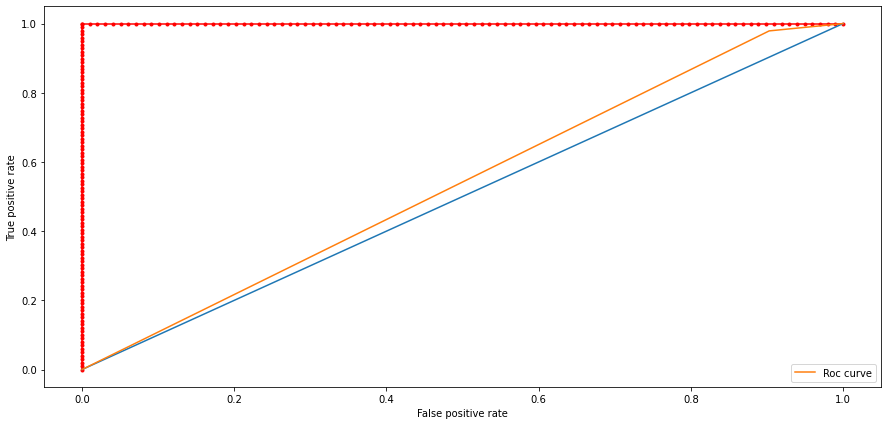

In [ ]:
# We try a simple logit model with all the variables without any changes
test_model_logit(X, Y)

The AUC score is pretty low and a lot of variables are not significant

### Test probit model

Optimization terminated successfully.
         Current function value: 0.522420
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                         Probit   Df Residuals:                      920
Method:                           MLE   Df Model:                           25
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                 0.07194
Time:                        17:17:49   Log-Likelihood:                -494.21
converged:                       True   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 3.832e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1296      0.460     -2.456      0.014      -2.031      -0.228
polintr       -0.0424      0.

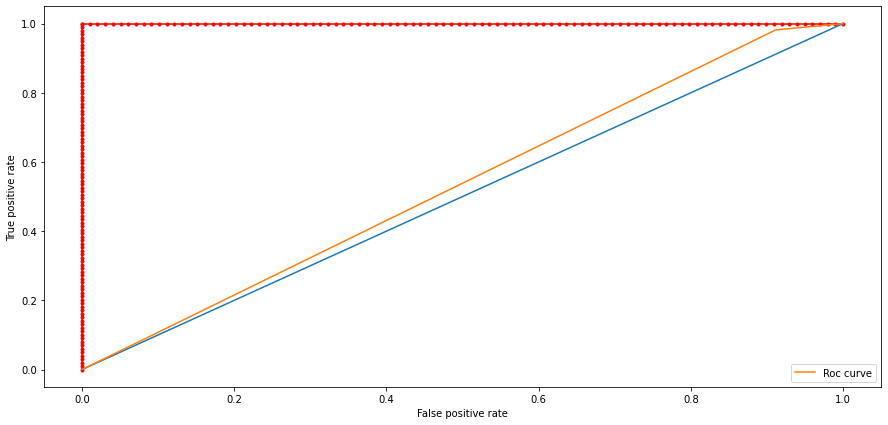

In [ ]:
test_model_probit(X, Y)

Looking at a probit model we are not getting a better result

## Feature cleaning and ingineering

As the previous simple models weren't performing well we are going to work a little bit on the variables

### Cleaning unwanted values

In [ ]:
# Creating a function for defining a new column giving the information if the individual responded to the question or not
def create_answers_dummies(x):
    if x <= 10 and x >= 1:
        return 1
    else:
        return 0

In [ ]:
X_with_answer_dummies = X.copy()

In [ ]:
for col in X.columns:
    if col != "const":
        X_with_answer_dummies["{}_did_answer".format(col)] = X[col].apply(create_answers_dummies)
    for col in X_with_answer_dummies.columns[len(X.columns): ]:
        if col != "const" and X_with_answer_dummies[col].sum() == X_with_answer_dummies.shape[0]:
            X_with_answer_dummies.drop(columns=col, inplace=True)

In [ ]:
X_with_answer_dummies.head()

,const,polintr,psppsgva,psppipla,cptppola,trstlgl,trstplc,trstplt,trstprt,trstep,...,trstep_did_answer,trstun_did_answer,stflife_did_answer,stfeco_did_answer,stfgov_did_answer,stfdem_did_answer,stfhlth_did_answer,imbgeco_did_answer,imueclt_did_answer,imwbcnt_did_answer
0,1.0,1,2,3,2,6,3,2,2,6,...,1,1,1,1,1,1,1,1,1,1
1,1.0,3,2,2,3,7,8,5,5,6,...,1,1,1,1,1,1,1,1,1,1
2,1.0,1,2,2,2,9,8,4,3,4,...,1,1,1,1,1,1,1,1,1,1
3,1.0,3,1,2,2,4,6,1,2,1,...,1,1,1,1,1,1,1,1,1,1
4,1.0,2,2,4,3,8,7,5,3,4,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
print(X_with_answer_dummies.shape)
print(X_with_answer_dummies.sum())

(946, 40)
const                  946.0
polintr               2132.0
psppsgva              2187.0
psppipla              2066.0
cptppola              2228.0
trstlgl               5438.0
trstplc               6519.0
trstplt               4126.0
trstprt               3550.0
trstep                5137.0
trstun                7603.0
badge                 1752.0
sgnptit               1517.0
prtdgcl               3585.0
stflife               6466.0
stfeco                3994.0
stfgov                4373.0
stfdem                5111.0
stfhlth               5958.0
gincdif               1852.0
imdfetn               2230.0
impcntr               2281.0
imbgeco               5852.0
imueclt               6004.0
imwbcnt               6293.0
hmsfmlsh              4322.0
trstlgl_did_answer     900.0
trstplc_did_answer     927.0
trstplt_did_answer     861.0
trstprt_did_answer     830.0
trstep_did_answer      833.0
trstun_did_answer      852.0
stflife_did_answer     933.0
stfeco_did_answer      875.0
stfg

Optimization terminated successfully.
         Current function value: 0.501296
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                          Logit   Df Residuals:                      906
Method:                           MLE   Df Model:                           39
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.1095
Time:                        17:17:50   Log-Likelihood:                -474.23
converged:                       True   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 1.165e-09
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.3123      2.344     -3.546      0.000     -12.906      -3.718
polin

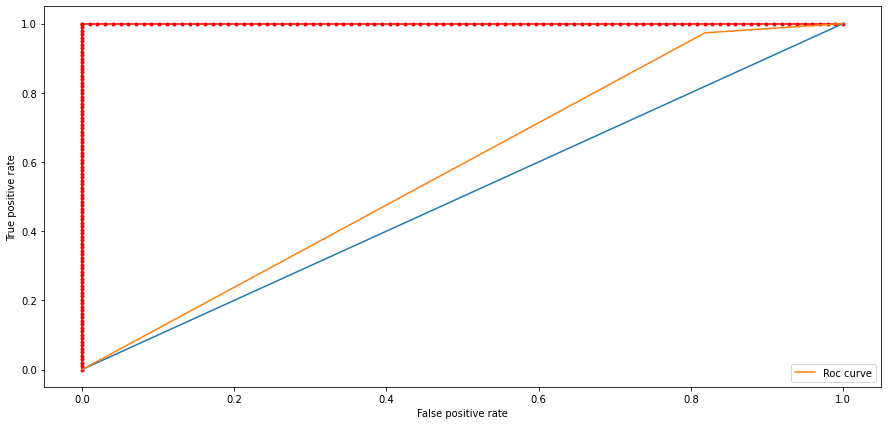

In [ ]:
# We try a new model but this time using new variables for which the individuals responded or not to the question
test_model_logit(X_with_answer_dummies, Y)

Creating these variables seems to increase AUC score to 0.577

Optimization terminated successfully.
         Current function value: 0.500718
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                         Probit   Df Residuals:                      906
Method:                           MLE   Df Model:                           39
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.1105
Time:                        17:17:50   Log-Likelihood:                -473.68
converged:                       True   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 7.981e-10
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.9360      1.312     -3.762      0.000      -7.508      -2.364
polin

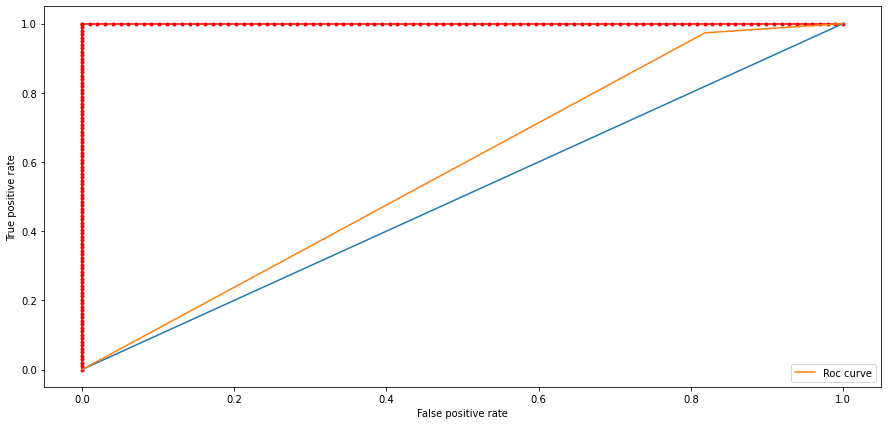

In [ ]:
test_model_probit(X_with_answer_dummies, Y)

Again the probit model didn't improved the accuracy over the logit

### Dealing with odd values

Some columns do have strange values that are equivalents to "refusal", "don't answers" or blank that we need to clean up 

In [ ]:
X_with_answer_dummies_cleaned = X_with_answer_dummies.copy()

In [ ]:
def outlier_standardization(x):
    if x == 7:
        return 77
    elif x == 8:
        return 88
    elif x == 9:
        return 99
    else:
        return x

In [ ]:
for col in ['polintr', 'psppsgva', 'psppipla', 'cptppola', 'badge', 'sgnptit', 'prtdgcl', 'gincdif', 'imdfetn', 'impcntr', 'hmsfmlsh']:
    X_with_answer_dummies_cleaned[col] = X_with_answer_dummies_cleaned[col].apply(outlier_standardization)

In [ ]:
def replace_by_mean(x, col_mean):
    if x <= 10:
        return x
    else:
        return col_mean

In [ ]:
for col in X_with_answer_dummies_cleaned.columns:
    col_mean = X_with_answer_dummies_cleaned[X_with_answer_dummies_cleaned[col]<=10][col].mean()
    X_with_answer_dummies_cleaned[col] = X_with_answer_dummies_cleaned[col].apply(replace_by_mean, col_mean=col_mean)

In [ ]:
X_with_answer_dummies_cleaned.head()

,const,polintr,psppsgva,psppipla,cptppola,trstlgl,trstplc,trstplt,trstprt,trstep,...,trstep_did_answer,trstun_did_answer,stflife_did_answer,stfeco_did_answer,stfgov_did_answer,stfdem_did_answer,stfhlth_did_answer,imbgeco_did_answer,imueclt_did_answer,imwbcnt_did_answer
0,1.0,1,2.0,3.0,2.0,6.0,3.0,2.0,2.0,6.0,...,1,1,1,1,1,1,1,1,1,1
1,1.0,3,2.0,2.0,3.0,7.0,8.0,5.0,5.0,6.0,...,1,1,1,1,1,1,1,1,1,1
2,1.0,1,2.0,2.0,2.0,9.0,8.0,4.0,3.0,4.0,...,1,1,1,1,1,1,1,1,1,1
3,1.0,3,1.0,2.0,2.0,4.0,6.0,1.0,2.0,1.0,...,1,1,1,1,1,1,1,1,1,1
4,1.0,2,2.0,4.0,3.0,8.0,7.0,5.0,3.0,4.0,...,1,1,1,1,1,1,1,1,1,1


Optimization terminated successfully.
         Current function value: 0.491608
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                          Logit   Df Residuals:                      906
Method:                           MLE   Df Model:                           39
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.1267
Time:                        17:17:51   Log-Likelihood:                -465.06
converged:                       True   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 1.714e-12
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.0517      1.562     -3.234      0.001      -8.113      -1.991
polin

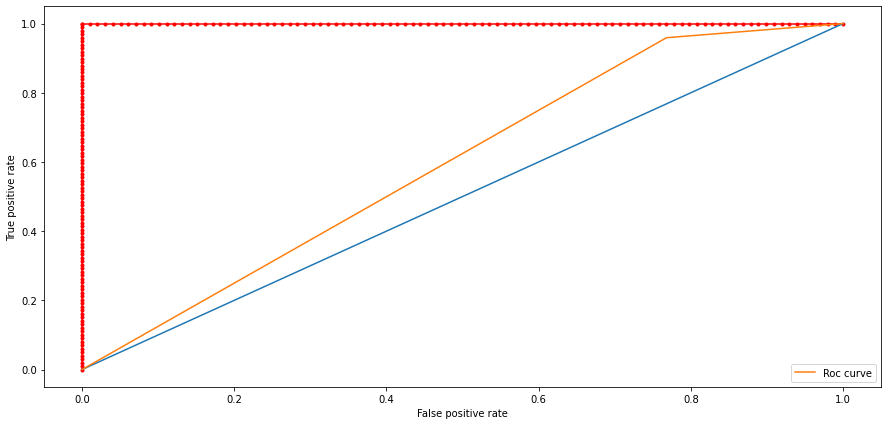

In [ ]:
# We try the model after clean up of strange variables
test_model_logit(X_with_answer_dummies_cleaned, Y)

Again it increased the AUC score to 0.59 but a lot of variables are not significant still

Optimization terminated successfully.
         Current function value: 0.491589
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                         Probit   Df Residuals:                      906
Method:                           MLE   Df Model:                           39
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.1267
Time:                        17:17:51   Log-Likelihood:                -465.04
converged:                       True   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 1.692e-12
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.0408      0.919     -3.308      0.001      -4.842      -1.239
polin

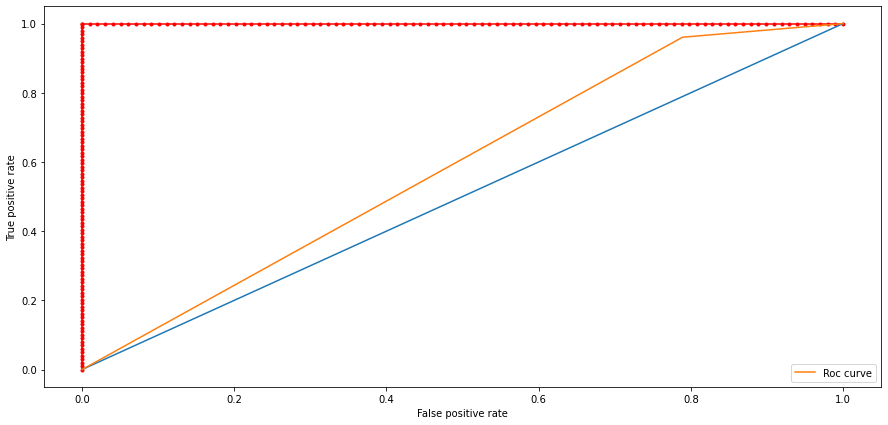

In [ ]:
test_model_probit(X_with_answer_dummies_cleaned, Y)

### Standardization

We are going to try to standerdized all variables

In [ ]:
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X_with_answer_dummies_cleaned.drop(columns='const')), columns=X_with_answer_dummies_cleaned.drop(columns='const').columns)
X_std.head()

,polintr,psppsgva,psppipla,cptppola,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,...,trstep_did_answer,trstun_did_answer,stflife_did_answer,stfeco_did_answer,stfgov_did_answer,stfdem_did_answer,stfhlth_did_answer,imbgeco_did_answer,imueclt_did_answer,imwbcnt_did_answer
0,-1.311001,-0.298497,0.897534,-0.326093,0.205067,-1.798354,-0.905295,-0.659596,0.753926,0.392437,...,0.368313,0.332158,0.11804,0.284856,0.382971,0.301859,0.098006,0.26711,0.24362,0.246045
1,0.780410,-0.298497,-0.169987,0.753585,0.613901,0.660822,0.502775,0.843261,0.753926,0.392437,...,0.368313,0.332158,0.11804,0.284856,0.382971,0.301859,0.098006,0.26711,0.24362,0.246045
2,-1.311001,-0.298497,-0.169987,-0.326093,1.431569,0.660822,0.033419,-0.158644,-0.084569,0.813500,...,0.368313,0.332158,0.11804,0.284856,0.382971,0.301859,0.098006,0.26711,0.24362,0.246045
3,0.780410,-1.373546,-0.169987,-0.326093,-0.612601,-0.322848,-1.374651,-0.659596,-1.342312,-0.449687,...,0.368313,0.332158,0.11804,0.284856,0.382971,0.301859,0.098006,0.26711,0.24362,0.246045
4,-0.265295,-0.298497,1.965055,0.753585,1.022735,0.168987,0.502775,-0.158644,-0.084569,0.392437,...,0.368313,0.332158,0.11804,0.284856,0.382971,0.301859,0.098006,0.26711,0.24362,0.246045


Optimization terminated successfully.
         Current function value: 0.491608
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                          Logit   Df Residuals:                      906
Method:                           MLE   Df Model:                           39
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.1267
Time:                        17:17:51   Log-Likelihood:                -465.06
converged:                       True   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 1.714e-12
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2727      0.088     14.526      0.000       1.101       1.444
polin

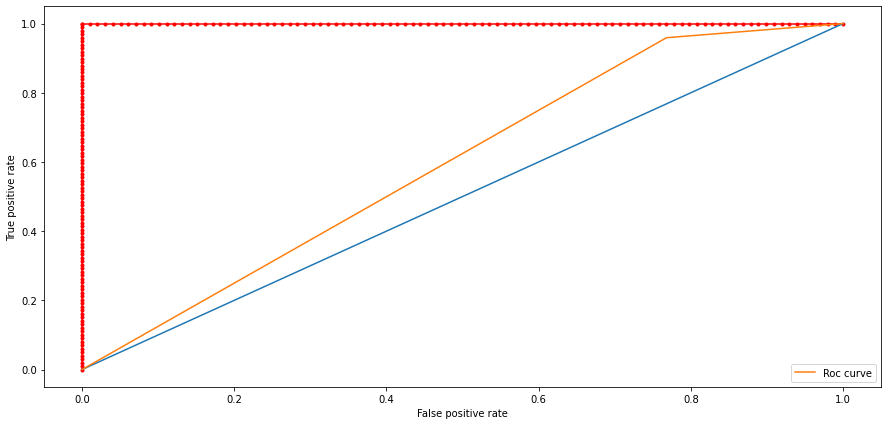

In [ ]:
X_std = sm.add_constant(X_std)
model_logit_std = test_model_logit(X_std, Y)

Optimization terminated successfully.
         Current function value: 0.491589
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                         Probit   Df Residuals:                      906
Method:                           MLE   Df Model:                           39
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.1267
Time:                        17:17:52   Log-Likelihood:                -465.04
converged:                       True   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 1.692e-12
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.7567      0.049     15.515      0.000       0.661       0.852
polin

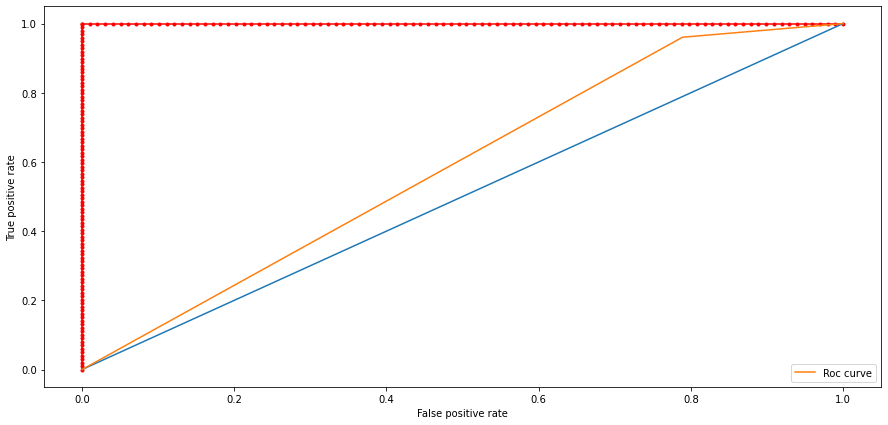

In [ ]:
model_probit_std = test_model_probit(X_std, Y)

## Significance interpretation

We are deleting every insignificant variables

In [ ]:
X_std_cleaned = X_std.copy()

p_values = model_logit_std.pvalues

for i, val in enumerate(p_values):
    if val > 0.8:
        column_name = X_std.columns[i]
        print(X_std.columns[i])
        print(val)
        print("-------")
        X_std_cleaned.drop(columns=column_name, inplace=True)

stfeco
0.9486818261076568
-------
stfhlth
0.8232548375233241
-------
trstplt_did_answer
0.9427125027761856
-------
stfeco_did_answer
0.8485839664310785
-------


In [ ]:
def recursive_model_optimiser(X, Y):
    model = sm.Logit(Y, X).fit()
    p_values = list(model.pvalues)
    max_p_values = max(p_values)
    index_max_value = p_values.index(max_p_values)
    if max_p_values < 0.20:
        print("The significant parameters are:")
        print(list(X.columns))
        list_variables = list(X.columns)
        return list_variables
    else:
        new_X = X.drop(columns=X.columns[index_max_value])
        return recursive_model_optimiser(new_X, Y)

In [ ]:
list_significant_variables = recursive_model_optimiser(X_std_cleaned, Y)

Optimization terminated successfully.
         Current function value: 0.491662
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491693
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491729
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491776
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491826
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491884
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.491958
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.492053
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.492131
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.492248
  

In [ ]:

X_std_significant = X_std_cleaned[list_significant_variables]

Optimization terminated successfully.
         Current function value: 0.496802
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                          Logit   Df Residuals:                      931
Method:                           MLE   Df Model:                           14
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.1174
Time:                        17:17:53   Log-Likelihood:                -469.97
converged:                       True   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 6.317e-20
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.2551      0.086     14.568      0.000       1.086       1.424
pspps

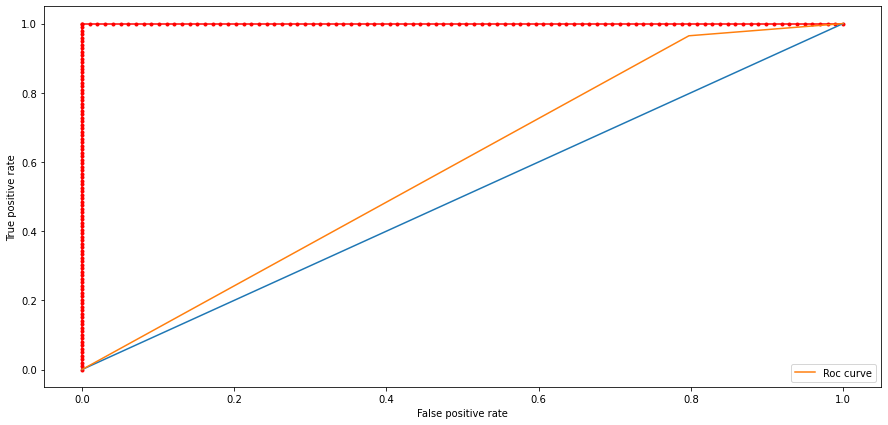

In [ ]:
model_logit_std_cleaned = test_model_logit(X_std_significant, Y)

The great news is that we atteined a high AUC score while keeping only significant variables

## Analysis of residuals

In [ ]:
residuals_model_logit_std_cleaned = model_logit_std_cleaned.resid_dev

In [ ]:
fig = px.scatter(x=model_logit_std_cleaned.predict(X_std_significant), y=residuals_model_logit_std_cleaned)
fig.show()

## Segmentation and dummies

In [ ]:
list_significant_variables_X = recursive_model_optimiser(X, Y)

Optimization terminated successfully.
         Current function value: 0.522566
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.522570
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.522574
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.522594
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.522628
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.522676
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.522768
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.522875
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.523065
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.523214
  

In [ ]:
X_significant = X[list_significant_variables_X]

In [ ]:
X_significant.head()

,const,psppsgva,psppipla,trstlgl,badge,sgnptit,prtdgcl,stfdem,stfhlth,imwbcnt,hmsfmlsh
0,1.0,2,3,6,2,1,2,4,3,7,5
1,1.0,2,2,7,2,1,2,6,4,6,5
2,1.0,2,2,9,2,1,2,4,7,7,5
3,1.0,1,2,4,2,1,2,7,7,5,5
4,1.0,2,4,8,2,1,3,2,5,4,5


In [ ]:
def one_to_ten_to_categ(x):
    if x>=0 and x<=4:
        return "Low"
    elif x>4 and x<=7:
        return "Medium"
    elif x>7 and x<=10:
        return "High"
    else:
        return "Not answering"

In [ ]:
def one_to_five_to_categ(x):
    if x>=0 and x<=1:
        return "Low"
    elif x>1 and x<=3:
        return "Medium"
    elif x>3 and x<=5:
        return "High"
    else:
        return "Not answering"

In [ ]:
list_ten = ["stfdem", "stfhlth", "imwbcnt", "trstlgl"]
list_five = ["psppsgva","psppipla","badge","sgnptit","hmsfmlsh"]
for col in list_ten:
    X_significant[col] = X_significant[col].apply(one_to_ten_to_categ)
for col in list_five:
    X_significant[col] = X_significant[col].apply(one_to_five_to_categ)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X_significant.drop(columns="prtdgcl", inplace=True)
X_significant.head()

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,const,psppsgva,psppipla,trstlgl,badge,sgnptit,stfdem,stfhlth,imwbcnt,hmsfmlsh
0,1.0,Medium,Medium,Medium,Medium,Low,Low,Low,Medium,High
1,1.0,Medium,Medium,Medium,Medium,Low,Medium,Low,Medium,High
2,1.0,Medium,Medium,High,Medium,Low,Low,Medium,Medium,High
3,1.0,Low,Medium,Low,Medium,Low,Medium,Medium,Medium,High
4,1.0,Medium,High,High,Medium,Low,Low,Medium,Low,High


In [ ]:
X_significant_dummies = pd.get_dummies(X_significant.drop(columns="const").astype(str), drop_first=True)

In [ ]:
X_significant_dummies.head()

,psppsgva_Low,psppsgva_Medium,psppsgva_Not answering,psppipla_Low,psppipla_Medium,psppipla_Not answering,trstlgl_Low,trstlgl_Medium,trstlgl_Not answering,badge_Medium,...,stfdem_Not answering,stfhlth_Low,stfhlth_Medium,stfhlth_Not answering,imwbcnt_Low,imwbcnt_Medium,imwbcnt_Not answering,hmsfmlsh_Low,hmsfmlsh_Medium,hmsfmlsh_Not answering
0,0,1,0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
2,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,1,0,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [ ]:
X_significant_dummies = sm.add_constant(X_significant_dummies)

/root/venv/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

         Current function value: 0.517759
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                          Logit   Df Residuals:                      922
Method:                           MLE   Df Model:                           23
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                 0.08022
Time:                        17:17:55   Log-Likelihood:                -489.80
converged:                      False   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 4.094e-09
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------

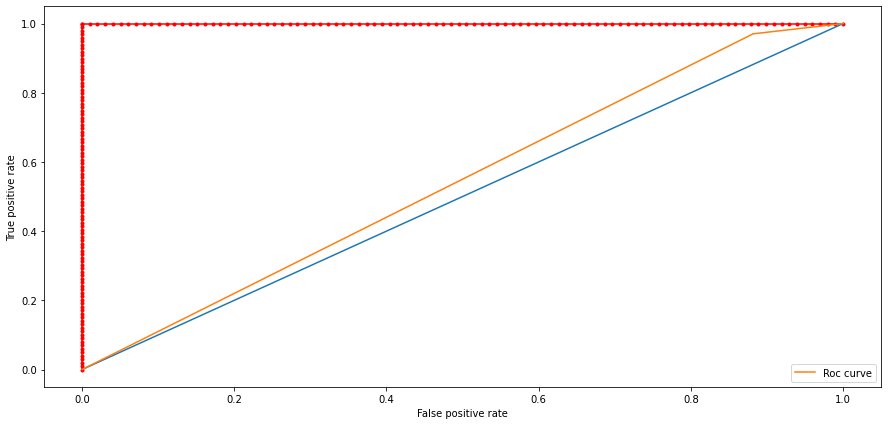

In [ ]:
model_significant_dummies = test_model_logit(X_significant_dummies, Y)

In [ ]:
X_significant_dummies.describe()

,const,psppsgva_Low,psppsgva_Medium,psppsgva_Not answering,psppipla_Low,psppipla_Medium,psppipla_Not answering,trstlgl_Low,trstlgl_Medium,trstlgl_Not answering,...,stfdem_Not answering,stfhlth_Low,stfhlth_Medium,stfhlth_Not answering,imwbcnt_Low,imwbcnt_Medium,imwbcnt_Not answering,hmsfmlsh_Low,hmsfmlsh_Medium,hmsfmlsh_Not answering
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,...,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,1.0,0.215645,0.686047,0.006342,0.276956,0.640592,0.004228,0.302326,0.464059,0.003171,...,0.009514,0.200846,0.520085,0.002114,0.282241,0.548626,0.019027,0.025370,0.103594,0.009514
std,0.0,0.411486,0.464343,0.079429,0.447731,0.480081,0.064922,0.459508,0.498970,0.056254,...,0.097125,0.400845,0.499861,0.045956,0.450328,0.497893,0.136694,0.157329,0.304894,0.097125
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
scaler = StandardScaler()
X_signif_dummies_std = pd.DataFrame(scaler.fit_transform(X_significant_dummies.drop(columns='const')), columns=X_significant_dummies.drop(columns='const').columns)
X_signif_dummies_std = sm.add_constant(X_signif_dummies_std)
model_updated = sm.Logit(Y,X_signif_dummies_std)
model_updated.fit(maxiter = 100).summary()

Optimization terminated successfully.
         Current function value: 0.517759
         Iterations 54


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                          Logit   Df Residuals:                      922
Method:                           MLE   Df Model:                           23
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                 0.08022
Time:                        17:17:56   Log-Likelihood:                -489.80
converged:                       True   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 4.094e-09
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.7735   2.89e+06   6.13e-07      1.000   -5.67e+06    5.67e+06
psppsgva_Low              -0.2260      0.151     -1.496      0.135      -0.522       0.070
psppsgva_Medium           -0.0236      0.155     -0.152      0.879      -0.327       0.280
psppsgva_Not answering    -0.1007      0.074     -1.361      0.174      -0.246       0.044
psppipla_Low              -0.1593      0.172     -0.928      0.353      -0.496       0.177
psppipla_Medium           -0.0457      0.170     -0.268      0.788      -0.379       0.288
psppipla_Not answering     5.0172   5.06e+07   9.92e-08      1.000   -9.91e+07    9.91e+07
trstlgl_Low               -0.0381      0.112     -0.341      0.733      -0.257       0.181
trstlgl_Medium             0.0648      0.111      0.586      0.558      -0.152       0.282
trstlgl_Not answering      2.2951   2.81e+07   8.16e-08      1.000   -5.51e+07    5.51e+07
badge_Medium               0.0813      0.078      1.041      0.298      -0.072       0.234
sgnptit_Medium             0.1301      0.085      1.538      0.124      -0.036       0.296
stfdem_Low                -0.5169      0.163     -3.175      0.002      -0.836      -0.198
stfdem_Medium             -0.2641      0.157     -1.684      0.092      -0.571       0.043
stfdem_Not answering       0.0187      0.112      0.167      0.867      -0.201       0.238
stfhlth_Low                0.0074      0.099      0.075      0.940      -0.186       0.201
stfhlth_Medium            -0.0349      0.099     -0.351      0.726      -0.230       0.160
stfhlth_Not answering      2.5705   6.89e+07   3.73e-08      1.000   -1.35e+08    1.35e+08
imwbcnt_Low               -0.1671      0.119     -1.406      0.160      -0.400       0.066
imwbcnt_Medium             0.0377      0.121      0.311      0.756      -0.200       0.275
imwbcnt_Not answering      0.0851      0.112      0.758      0.448      -0.135       0.305
hmsfmlsh_Low              -0.1522      0.073     -2.094      0.036      -0.295      -0.010
hmsfmlsh_Medium           -0.0768      0.077     -1.004      0.316      -0.227       0.073
hmsfmlsh_Not answering     0.0727      0.118      0.618      0.537      -0.158       0.303
==========================================================================================
"""

## Variable statistical interpretation


Looking at our results we are going to work with our best model yet. Our best model is the logistic model using the variables: const, psppsgva, trstplt, trstprt, sgnptit, prtdgcl, stflife, stfgov, stfdem, imueclt,       hmsfmlsh, trstlgl_did_answer, stfdem_did_answer, stfhlth_did_answer, imueclt_did_answer. It achieved a AUC score of 0.583 which were our highest while keeping the variable statisticaly significant at a 80% for the poorest and 99% for our best estimates

In [ ]:
list_significant_variables = recursive_model_optimiser(X_with_answer_dummies, Y)

Optimization terminated successfully.
         Current function value: 0.501296
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501296
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501305
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501313
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501323
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501328
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501346
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501363
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501387
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.501435
  

Optimization terminated successfully.
         Current function value: 0.506336
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             is_extreme   No. Observations:                  946
Model:                          Logit   Df Residuals:                      932
Method:                           MLE   Df Model:                           13
Date:                Mon, 14 Mar 2022   Pseudo R-squ.:                  0.1005
Time:                        17:17:56   Log-Likelihood:                -478.99
converged:                       True   LL-Null:                       -532.52
Covariance Type:            nonrobust   LLR p-value:                 7.062e-17
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -8.0704      2.153     -3.748      0.000     -12.291      -3.850
pspps

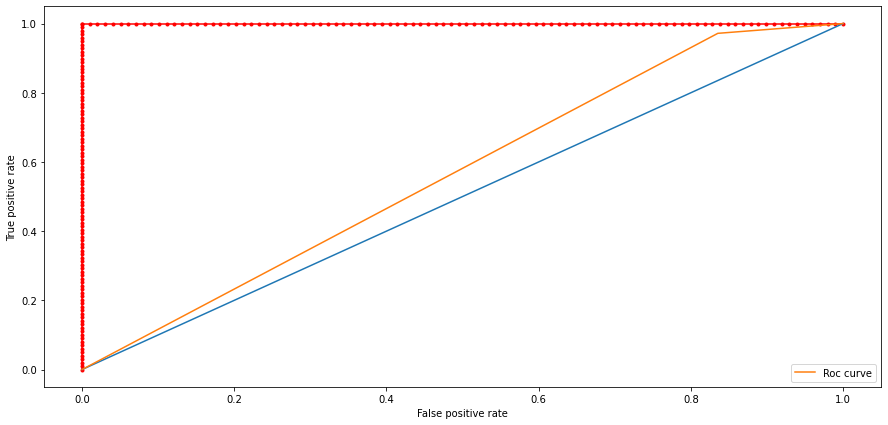

In [ ]:
good_X = X_with_answer_dummies[list_significant_variables]
model_logit_std_cleaned = test_model_logit(good_X, Y)

### Function definitions: 

In [ ]:
def compute_score(betas, x_values):
    B0 = betas[0]
    betas_without_B0 = betas[1:]
    score = B0
    for i, b in enumerate(betas_without_B0):
        score += b*x_values[i]
    return score

def logistic_prediction(betas, x_values):
    score = compute_score(betas, x_values)
    proba = 1 / (1 + np.exp(-score))
    return proba

def odd_logit(betas, x_values, message=True):
    score = compute_score(betas, x_values)
    odd = np.exp(score)
    if message:
        print("The probability/chance he votes extreme is equal to {} times the probability/chance he does not vote extreme.".format(round(odd, 4)))
        if odd<1:
            print("The probability/chance he does not vote extreme is 1/Ci = {} times larger than the probability/chance he votes extreme.".format(round(1/odd, 4)))
        else:
            print("The probability/chance he does vote extreme is 1/Ci = {} times larger than the probability/chance that he does not vote extreme.".format(round(1/odd, 4)))
    return odd

def odd_ratio(betas, x_values, x_values_after, activation="logit"):
    if activation == "logit":
        odd_modified = odd_logit(betas=betas, x_values=x_values_after, message=False)
        original_odd = odd_logit(betas=betas, x_values=x_values, message=False)
    else:
        odd_modified = odd_probit(betas=betas, x_values=x_values_after, message=False)
        original_odd = odd_probit(betas=betas, x_values=x_values, message=False)
    odd_ratio = odd_modified / original_odd
    print("If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by {} times for all individuals.".format(round(odd_ratio,4)))
    if odd_ratio>=1:
        print("Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by {}% for all the individuals.".format(round((odd_ratio-1)*100, 4)))
    else:
        print("Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) decreases by {}% for all the individuals.".format(round((1 - odd_ratio)*100, 4)))
    
        return odd_ratio

    
def marginal_effect_logit(individual_values, betas, target_beta):
    score_individual = compute_score(betas=betas, x_values=individual_values)
    print(score_individual)
    marginal_effect_variable = target_beta *(np.exp(score_individual)/(1+np.exp(score_individual))**2)
    if marginal_effect_variable>=0:
        print("A 1 unit increase of the variable for individual i leads to a {} increase of the probability of him voting extreme.".format(round(marginal_effect_variable, 6)))
    else:
        print("A 1 unit increase of the variable for individual i leads to a {} decrease of the probability of him voting extreme.".format(round(marginal_effect_variable, 6)))
    return marginal_effect_variable

def elasticity_logit(individual_values, betas, target_beta, target_attribut):
    score_individual  = compute_score(betas=betas, x_values=individual_values)
    elasticity_result = (target_beta*target_attribut) / (1 + np.exp(score_individual))
    if elasticity_result>=0:
        print("A 1% increase of the variable for individual i leads to a {} increase of the probability him voting extreme.".format(round(elasticity_result, 6)))
    else:
        print("A 1% increase  of the variable for individual i leads to a {} decrease of the probability him voting extreme.".format(round(elasticity_result, 6)))
    
    return elasticity_result

def lrt_test(LLn_restricted, LLn_unrestricted):
    LRT=-2*(LLn_restricted-LLn_unrestricted) 
    pvalue=1-stats.chi2.cdf(LRT, 2)
    return pvalue

def normalize_marginal_effect_qualitative(x_values, x_values_reference, betas):
    score_value = compute_score(betas, x_values)
    proba_value = 1 / (1 + np.exp(-score_value))
    
    score_value_reference = compute_score(betas, x_values_reference)
    proba_value_reference = 1 / (1 + np.exp(-score_value_reference))
    
    normalize_marginal_effect = (proba_value-proba_value_reference) / proba_value_reference
    return normalize_marginal_effect

def marginal_effect_qualitative(x_values, x_values_reference, betas):
    score_value = compute_score(betas, x_values)
    proba_value = 1 / (1 + np.exp(-score_value))
    
    score_value_reference = compute_score(betas, x_values_reference)
    proba_value_reference = 1 / (1 + np.exp(-score_value_reference))
    
    marginal_effect = proba_value-proba_value_reference
    return marginal_effect

def information_criteria(loglikelihood, number_of_predictive_variables, number_of_items):
    AIC = -2*loglikelihood + 2*(number_of_predictive_variables + 1)
    print("AIC: ", AIC)
    
    BIC = -2*loglikelihood + (number_of_predictive_variables + 1) * np.log(number_of_items)
    print("BIC: ", BIC)
    return AIC, BIC

def somers_D(number_of_concordant_pairs, number_of_discordant_pairs, number_of_total_pairs):
    D = (number_of_concordant_pairs - number_of_discordant_pairs) / (number_of_total_pairs)
    return D

def gamma(number_of_concordant_pairs, number_of_discordant_pairs):
    T = (number_of_concordant_pairs - number_of_discordant_pairs) / (number_of_concordant_pairs + number_of_discordant_pairs)
    return T

def kendall_tau(number_of_concordant_pairs, number_of_discordant_pairs, number_of_individuals):
    Ta = (number_of_concordant_pairs - number_of_discordant_pairs) / (0.5 * number_of_individuals * (number_of_individuals -1))
    return Ta

def C(number_of_concordant_pairs, number_of_tied_pairs, total_number_of_pairs):
    c = (number_of_concordant_pairs + 0.5 *number_of_tied_pairs) / total_number_of_pairs
    return c

def confusion_matrix(N00, N01, N10, N11):
    sensitivity = N11 / (N10 + N11)
    print("Sensitivity: ", sensitivity)
    
    specificity = N00 / (N00 + N01)
    print("Specificity: ", specificity)
    
    PCC = (N00 + N11) / (N00 + N01 + N10 + N11)
    print("PCC: ", PCC)
    
    NPE = (N01 + N10) / (N00 + N01 + N10 + N11)
    print("NPE: ", NPE)
    
def ssr(list_results, list_predicted_proba_results):
    ssr_computed = 0
    for i in range(len(list_results)):
        ssr_computed += (list_results[i] - list_predicted_proba_results[i])**2
    return ssr_computed

def ssr_r(list_results, list_predicted_proba_results):
    ssr_computed = 0
    for i in range(len(list_results)):
        ssr_computed += ((list_results[i] - list_predicted_proba_results[i])**2)/(list_predicted_proba_results[i]*(1-list_predicted_proba_results[i]))
    return ssr_computed

def R2_efron(list_results, list_predicted_proba_results):
    SSR_model = 0
    SSR_naive = 0
    means_results = np.mean(list_results)
    for i in range(len(list_results)):
        SSR_model += (list_results[i] - list_predicted_proba_results[i])**2
        SSR_naive += (list_results[i] - means_results)**2
    R2_intermediate_computation = SSR_model / SSR_naive
    return (1 - R2_intermediate_computation)

def R2_mcfadden(log_likelihood_unrestricted_model, log_likelihood_restricted_model):
    pseudo_R2 = 1 - (log_likelihood_unrestricted_model / log_likelihood_restricted_model)
    return pseudo_R2

from sklearn.metrics import confusion_matrix

def create_roc_curve_with_different_threshold(actual_values, estimated_probabilities, thresholds):
    all_pred = pd.DataFrame({"y":actual_values, "estimated_proba":estimated_probabilities})
    dict_pred = {}
    for thresh in thresholds:
        y_prediction = []
        for proba in estimated_probabilities:
            if proba < thresh:
                y_prediction.append(0)
            else:
                y_prediction.append(1)
        all_pred["y_predicted_thresh_{}".format(str(thresh))] = y_prediction
        print("\n")
        print("-------------------------------")
        print("For the threshold: ", thresh)
        confus_matrix = confusion_matrix(actual_values, y_prediction)
        print(confus_matrix)
        sensitivity = confus_matrix[1][1] / (confus_matrix[1][0] + confus_matrix[1][1])
        print("Sensitivity: ", sensitivity)
    
        specificity = confus_matrix[0][0] / (confus_matrix[0][0] + confus_matrix[0][1])
        print("1 minus specificity: ", 1-specificity)
        print("-------------------------------")
        dict_pred[thresh] = confusion_matrix(actual_values, y_prediction)
        
    print("***********************")
    print(all_pred.head(30))

In [ ]:
def responseprofile(y):
    ydf = pd.DataFrame(y)
    ydf.columns = ['y'] 
    tata=pd.crosstab(index=ydf['y'], columns='count')
    tata[['count']]
    tata.index.name = 'values'
    tata.reset_index(inplace=True)
    the_table=pd.DataFrame(data=tata)
    the_table.columns = ['Values (y)' , 'Total Frequency']
    plt.subplot(212)
    plt.title('Response Profile',fontsize=20,y=1.7)
    plt.axis('off')
    plt.axis('tight')
    test2=plt.table(cellText=the_table.values, loc='center', cellLoc='center', colLabels=the_table.columns, colWidths=[0.4,0.4])
    test2.auto_set_font_size(False)
    test2.set_fontsize(16) 
    test2.scale(2, 1.7)

def convergence(y,logit_res):    
    val_listsetting = list(logit_res.mle_settings.values()) 
    val_listretvals = list(logit_res.mle_retvals.values()) 
    the_table2 = [ ['Optimizer',val_listsetting[0] ] ,   
                      ['Starting parameters', val_listsetting[1]],
                      ['Max. iterations', val_listsetting[2]], 
                      ['Tolerance rate', val_listsetting[9]],
                      ['Req. iterations', val_listretvals[1]],
                      ['Convergence Status', val_listretvals[5]]]
    the_table2=pd.DataFrame(data=the_table2)
    plt.subplot(212)
    plt.title('Model Convergence Status',fontsize=20,y=1.2)
    plt.axis('off')
    plt.axis('tight')
    test2=plt.table(cellText=the_table2.values, loc='center', cellLoc='center', colWidths=[0.4,0.4,0.4])
    test2.auto_set_font_size(False)
    test2.set_fontsize(16) 
    test2.scale(2, 1.7)
    
def informationcriteria(y,logit_res):
    the_table3 = [['AIC', np.round(-2*(logit_res.llnull-1),3),np.round(logit_res.aic,3)],
                      ['BIC', np.round(-2*logit_res.llnull+np.log(logit_res.nobs),3),np.round(logit_res.bic,3)], 
                      ['-2LogL', np.round(-2*logit_res.llnull,3),np.round(-2*logit_res.llf,3)]]
    the_table3=pd.DataFrame(data=the_table3)
    the_table3.columns = ['Criterion', 'Intercept Only', 'Intercept and Covariates']
    plt.subplot(311)
    plt.title('Information Criteria',fontsize=20, y=1.1)
    plt.axis('off')
    plt.axis('tight')
    test3=plt.table(cellText=the_table3.values, colLabels=the_table3.columns, loc='center', cellLoc='center', colWidths=[0.4,0.4,0.4])
    test3.auto_set_font_size(False)
    test3.set_fontsize(16) 
    test3.scale(2, 1.7)
    
def globalnull(y,logit_res):
    M = np.identity(len(logit_res.params))
    M = M[1:,:]
    wald_global = logit_res.wald_test(M,scalar=False) 

    globalnull = [['Likelihood Ratio Test',round(logit_res.llr,4),round(logit_res.df_model),round(logit_res.llr_pvalue,5)],
                 ['Wald',round(wald_global.statistic.item(),4), round(logit_res.df_model),round(wald_global.pvalue.item(),5)]]
    globalnull=pd.DataFrame(data=globalnull)
    globalnull.columns = ['Test','Chi-Square','DF','Pr>ChiSq' ]
    plt.subplot(312)
    plt.title('Testing Global Null Hypothesis: BETA=0',fontsize=20)
    plt.axis('off')
    plt.axis('tight')
    test=plt.table(cellText=globalnull.values, colLabels=globalnull.columns, 
                   loc='center', cellLoc='center', colWidths=[0.3,0.2,0.2,0.2])
    test.auto_set_font_size(False)
    test.set_fontsize(18) 
    test.scale(2, 1.7)

def oddsratioestimates(y,logit_res):
    freqy=y.value_counts()
    m=len(freqy)
    params = logit_res.params[1:len(logit_res.params)]
    conf = logit_res.conf_int()
    conf=conf.iloc[1:len(logit_res.params)]
    confodr=np.exp(conf)
    odr=np.exp(params.to_frame())
    odr=odr.rename(columns={0:'Point Estimate'})
    confodr=confodr.rename(columns={0:'5%', 1:'95%'})
    table=pd.concat([odr[['Point Estimate']], confodr[['5%','95%']]], axis=1)
    plt.subplot(313)
    plt.axis('off')
    plt.axis('tight')
    table.update(table.astype(float))
    table.update(table.applymap('{:,.3f}'.format))
    test=plt.table(cellText=table.values, colLabels=['Point Estimate', 'Lower CI (95% Wald)','Upper CI (95% Wald)'],  
                   rowLabels=table.index, loc='center',cellLoc='center',colWidths=[0.3,0.35,0.35])
    plt.axis('off')
    test.auto_set_font_size(False)
    test.set_fontsize(20) 
    test.scale(2, 1.7)
    print('!!ATTENTION: Odds ratio are only OK with the Logit link function!!')

def associationstat(X, y, logit_res):
    
    Xmat = np.array(X)
    ymat=np.array(y)
    beta_hat=np.array(logit_res.params)
    #print(np.shape(Xmat))
    #print(np.shape(beta_hat))
    score_hat=Xmat.dot(beta_hat)                    
    x=score_hat

    freqy=y.value_counts()
    total=freqy.iloc[0]*freqy.iloc[1] 
    
    x = np.asarray(x).ravel()
    y = np.asarray(y).ravel()

    if x.size != y.size:
        raise ValueError("All inputs must be of the same size, "
                         "found x-size %s and y-size %s" % (x.size, y.size))

    def count_rank_tie(ranks):
        cnt = np.bincount(ranks).astype('int64', copy=False)
        cnt = cnt[cnt > 1]
        return ((cnt * (cnt - 1) // 2).sum(),
            (cnt * (cnt - 1.) * (cnt - 2)).sum(),
            (cnt * (cnt - 1.) * (2*cnt + 5)).sum())

    size = x.size
    perm = np.argsort(y)  # sort on y and convert y to dense ranks
    x, y = x[perm], y[perm]
    y = np.r_[True, y[1:] != y[:-1]].cumsum(dtype=np.intp)

    # stable sort on x and convert x to dense ranks
    perm = np.argsort(x, kind='mergesort')
    x, y = x[perm], y[perm]
    x = np.r_[True, x[1:] != x[:-1]].cumsum(dtype=np.intp)

    nd = _kendall_dis(x, y)  # discordant pairs

    obs = np.r_[True, (x[1:] != x[:-1]) | (y[1:] != y[:-1]), True]
    cnt = np.diff(np.where(obs)[0]).astype('int64', copy=False)

    ntie = (cnt * (cnt - 1) // 2).sum()  # joint ties
    xtie, x0, x1 = count_rank_tie(x)     # ties in x, stats
    ytie, y0, y1 = count_rank_tie(y)     # ties in y, stats

    tot = (size * (size - 1)) // 2
    
    nc = tot - nd - (xtie - ntie) - (ytie - ntie) - ntie

    #return (nc,nd,ntie,total)
    #nc, nd, ntie, total = AssociationStat(x, y)
    
    the_table = [ ['Percent Concordant',round(nc/total*100,2), 'Somers D',round((nc-nd)/total,3)],   
                      ['Percent Discordant', round(nd/total*100,2), 'Gamma',round((nc-nd)/(nc+nd),3)],
                      ['Percent Tied', round((total-nc-nd)/total*100,2), 'Tau-a', round((nc-nd)/(0.5*y.size*(y.size-1)),3)],
                      ['Pairs', round(total),'c',round((nc+0.5*(total-nc-nd))/total,3)]]
    the_table=pd.DataFrame(data=the_table)
    plt.subplot(221)
    plt.title('Association of Predicted Probabilities and Observed Responses',fontsize=20,y=0.95)
    plt.axis('off')
    plt.axis('tight')
    test=plt.table(cellText=the_table.values, loc='center', cellLoc='center', colWidths=[0.8,0.4,0.4,0.4,0.4])
    test.auto_set_font_size(False)
    test.set_fontsize(20) 
    test.scale(2, 1.7)

### Coefficient interpretation

There are two variable that seems to have a lot of importance in the model, both of them give information concerning the response or not to two complicated questions that seems to give a big hint on whether or not someone might be voting for an extreme party: stfhlth_did_answer, imueclt_did_answer. As these coefficients are positive, if they answer the theses two questions they increase the probability to vote for a extreme party.


In [ ]:
print(model_logit_std_cleaned.params)

const                -8.070383
psppsgva              0.281062
trstplc               0.055829
trstun                0.010283
badge                 0.290889
sgnptit               0.369104
prtdgcl              -0.087617
stfhlth               0.055969
imwbcnt               0.022787
hmsfmlsh              0.171440
trstlgl_did_answer    0.700820
trstun_did_answer     0.427005
stfhlth_did_answer    3.718075
imueclt_did_answer    1.412974
dtype: float64


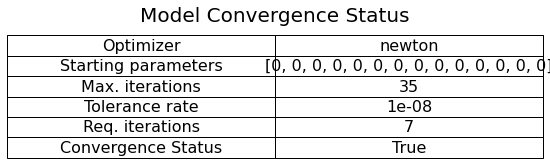

In [ ]:
convergence(Y,model_logit_std_cleaned)

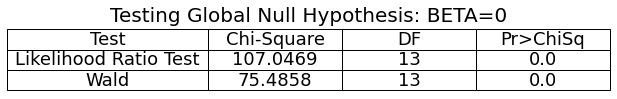

In [ ]:
globalnull(Y,model_logit_std_cleaned)

### Odd of each variable

Taking an individual that enswered every questions and psppsgva=3, trstplt=3, trstprt=3, sgnptit=3, prtdgcl=3, stflife=3, stfgov=3, stfdem=3, imueclt=3, hmsfmlsh=3

In [ ]:
betas = list(model_logit_std_cleaned.params)
individual_test = [4,6,5,1,1,3,6,6,5,1,1,1,1,1]
individual_ratio_psppsgva = [5,6,5,1,1,3,6,6,5,1,1,1,1,1]
individual_ratio_trstplt = [4,7,5,1,1,3,6,6,5,1,1,1,1,1]
individual_ratio_trstprt = [4,6,6,1,1,3,6,6,5,1,1,1,1,1]
individual_ratio_sgnptit = [4,6,5,0,1,3,6,6,5,1,1,1,1,1]
individual_ratio_prtdgcl = [4,6,5,1,0,3,6,6,5,1,1,1,1,1]
individual_ratio_stflife = [4,6,5,1,1,4,6,6,5,1,1,1,1,1]
individual_ratio_stfgov = [4,6,5,1,1,3,7,6,5,1,1,1,1,1]
individual_ratio_stfdem = [4,6,5,1,1,3,6,7,5,1,1,1,1,1]
individual_ratio_imueclt = [4,6,5,1,1,3,6,6,6,1,1,1,1,1]
individual_ratio_hmsfmlsh = [4,6,5,1,1,3,6,6,5,2,1,1,1,1]
individual_ratio_trstlgl_did_answer = [4,6,5,1,1,3,6,6,5,1,0,1,1,1]
individual_ratio_trstun_did_answer = [4,6,5,1,1,3,6,6,5,1,1,0,1,1]
individual_ratio_stfhlth_did_answer = [4,6,5,1,1,3,6,6,5,1,1,1,0,1]
individual_ratio_imueclt_did_answer = [4,6,5,1,1,3,6,6,5,1,1,1,1,0]

In [ ]:
odd_logit(betas=betas, x_values=individual_test, message=True)

The probability/chance he votes extreme is equal to 4.1621 times the probability/chance he does not vote extreme.
The probability/chance he does vote extreme is 1/Ci = 0.2403 times larger than the probability/chance that he does not vote extreme.


4.162067898336375

### Odd ratio

In [ ]:
odd_ratio(betas=betas, x_values=individual_test, x_values_after=individual_ratio_psppsgva, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 1.3245 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 32.4536% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_test, x_values_after=individual_ratio_trstplt, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 1.0574 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 5.7417% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_test, x_values_after=individual_ratio_trstprt, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 1.0103 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 1.0336% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_ratio_sgnptit, x_values_after=individual_test, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 1.3376 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 33.7616% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_ratio_prtdgcl, x_values_after=individual_test, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 1.4464 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 44.6438% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_test, x_values_after=individual_ratio_stflife, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 0.9161 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) decreases by 8.3888% for all the individuals.


0.9161115778616483

In [ ]:
odd_ratio(betas=betas, x_values=individual_test, x_values_after=individual_ratio_stfgov, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 1.0576 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 5.7565% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_test, x_values_after=individual_ratio_stfdem, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 1.023 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 2.3049% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_test, x_values_after=individual_ratio_imueclt, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 1.187 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 18.7012% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_test, x_values_after=individual_ratio_hmsfmlsh, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 2.0154 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 101.5404% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_ratio_trstlgl_did_answer, x_values_after=individual_test, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 1.5327 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 53.266% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_ratio_trstun_did_answer, x_values_after=individual_test, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 41.185 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 4018.5036% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_ratio_stfhlth_did_answer, x_values_after=individual_test, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 4.1082 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 310.8156% for all the individuals.


In [ ]:
odd_ratio(betas=betas, x_values=individual_ratio_imueclt_did_answer, x_values_after=individual_test, activation="logit")

If the variable increases by 1 unit, the chance to vote extreme (rather than not voting it) is multiplied by 1.0 times for all individuals.
Thus, if the variable increase by 1 unit, the odd (chance to vote extreme rather than not voting it) increases by 0.0% for all the individuals.


!!ATTENTION: Odds ratio are only OK with the Logit link function!!


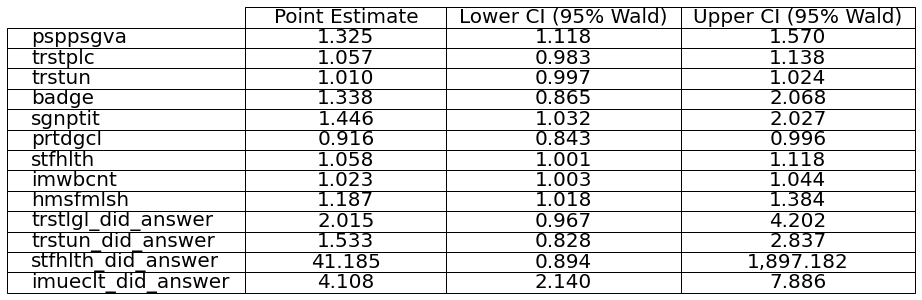

In [ ]:
oddsratioestimates(Y,model_logit_std_cleaned)

### Marginal effect at the mean

In [ ]:
mean_individual_extreme = good_X[Y==1].mean()
mean_individual_not_extreme = good_X[Y==0].mean()
mean_individual = good_X.mean()

In [ ]:
for b in betas[1:]:
    print("Individual overall mean: ")
    marginal_effect_logit(individual_values=mean_individual, betas=betas, target_beta=b)
    print("\n")
    print("Individual extreme mean: ")
    marginal_effect_logit(individual_values=mean_individual_extreme, betas=betas, target_beta=b)
    print("\n")
    print("Individual not extreme mean: ")
    marginal_effect_logit(individual_values=mean_individual_not_extreme, betas=betas, target_beta=b)
    print("\n")
    print("------------")

Individual overall mean: 
5.1438835948528565
A 1 unit increase of the variable for individual i leads to a 0.001621 increase of the probability of him voting extreme.


Individual extreme mean: 
5.525878136831287
A 1 unit increase of the variable for individual i leads to a 0.00111 increase of the probability of him voting extreme.


Individual not extreme mean: 
4.001123551550294
A 1 unit increase of the variable for individual i leads to a 0.004959 increase of the probability of him voting extreme.


------------
Individual overall mean: 
5.1438835948528565
A 1 unit increase of the variable for individual i leads to a 0.000322 increase of the probability of him voting extreme.


Individual extreme mean: 
5.525878136831287
A 1 unit increase of the variable for individual i leads to a 0.000221 increase of the probability of him voting extreme.


Individual not extreme mean: 
4.001123551550294
A 1 unit increase of the variable for individual i leads to a 0.000985 increase of the probabi

### Elasticity at the mean

In [ ]:
for i, b in enumerate(betas[1:]):
    print("Individual overall mean: ")
    elasticity_logit(individual_values=mean_individual, betas=betas, target_beta=b, target_attribut=mean_individual[i])
    print("\n")
    print("Individual extreme mean: ")
    elasticity_logit(individual_values=mean_individual_extreme, betas=betas, target_beta=b, target_attribut=mean_individual_extreme[i])
    print("\n")
    print("Individual not extreme mean: ")
    elasticity_logit(individual_values=mean_individual_not_extreme, betas=betas, target_beta=b, target_attribut=mean_individual_not_extreme[i])
    print("\n")
    print("------------")

Individual overall mean: 
A 1% increase of the variable for individual i leads to a 0.00163 increase of the probability him voting extreme.


Individual extreme mean: 
A 1% increase of the variable for individual i leads to a 0.001115 increase of the probability him voting extreme.


Individual not extreme mean: 
A 1% increase of the variable for individual i leads to a 0.00505 increase of the probability him voting extreme.


------------
Individual overall mean: 
A 1% increase of the variable for individual i leads to a 0.000749 increase of the probability him voting extreme.


Individual extreme mean: 
A 1% increase of the variable for individual i leads to a 0.000532 increase of the probability him voting extreme.


Individual not extreme mean: 
A 1% increase of the variable for individual i leads to a 0.002048 increase of the probability him voting extreme.


------------
Individual overall mean: 
A 1% increase of the variable for individual i leads to a 0.000411 increase of the p

### Association analysis

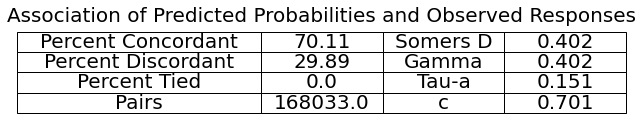

In [ ]:
associationstat(good_X, Y, model_logit_std_cleaned)

## Out of sample

In [ ]:
%%capture
predictions = []
for i, row in good_X.iterrows():
    new_X = good_X.drop(i)
    new_Y = Y.drop(i)
    model_fitted = sm.Logit(new_Y,new_X).fit()
    proba_predicted = model_fitted.predict(row)
    if proba_predicted[0] < 0.5:
        predictions.append(0)
    else:
        predictions.append(1)

In [ ]:
print(predictions)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[[ 35 202]
 [ 22 687]]
Specificity: 0.14767932489451477
Sensitivity: 0.9689703808180536
PCC: 0.7632135306553911
Rox AUC score: 0.5583248528562842


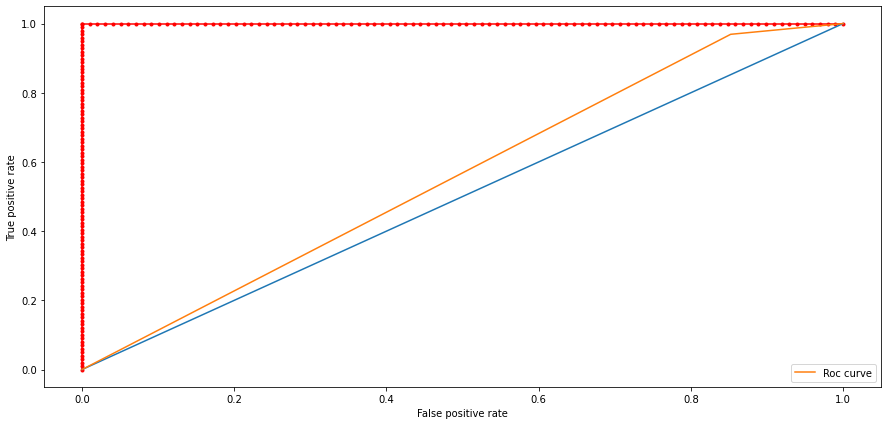

In [ ]:
y = Y
model_prediction = predictions


confusion_matrix_result = confusion_matrix(y, model_prediction)
print(confusion_matrix_result)

tn, fp, fn, tp = confusion_matrix_result.ravel()
specificity = tn / (tn + fp)
print("Specificity: " + str(specificity))

sensitivity = tp / (tp + fn)
print("Sensitivity: " + str(sensitivity))

PCC = (tn + tp) / (tn + fp + fn + tp)
print("PCC: " + str(PCC))

roc_score = roc_auc_score(y, model_prediction)
print("Rox AUC score: " + str(roc_score))

fpr , tpr , thresholds = roc_curve(y,model_prediction)

x=np.linspace(0,1,100)
ones = np.ones(100)
zeros = np.zeros(100)
fig,ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.plot(x,ones, color = 'r',marker='.')
ax.plot(zeros,x, color ='r',marker='.')
ax.plot(x,x)
ax.plot(fpr , tpr , label = "Roc curve")
ax.legend()

## Deep learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

In [ ]:
hidden_layer1 = Dense(units=128, activation="relu")
hidden_layer2 = Dense(units=128, activation="relu")
hidden_layer3 = Dense(units=64, activation="relu")
output_layer = Dense(units=1, activation="sigmoid")

model = Sequential([
    hidden_layer1,
    hidden_layer2,
    hidden_layer3,
    output_layer
])

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
h = model.fit(good_X, Y, epochs=25, verbose=2, validation_split=.2)

Epoch 1/25
24/24 - 1s - loss: 0.5857 - accuracy: 0.7381 - val_loss: 0.5002 - val_accuracy: 0.7947 - 812ms/epoch - 34ms/step
Epoch 2/25
24/24 - 0s - loss: 0.5662 - accuracy: 0.7500 - val_loss: 0.5026 - val_accuracy: 0.7895 - 61ms/epoch - 3ms/step
Epoch 3/25
24/24 - 0s - loss: 0.5563 - accuracy: 0.7579 - val_loss: 0.5090 - val_accuracy: 0.7947 - 72ms/epoch - 3ms/step
Epoch 4/25
24/24 - 0s - loss: 0.5424 - accuracy: 0.7579 - val_loss: 0.5311 - val_accuracy: 0.7789 - 70ms/epoch - 3ms/step
Epoch 5/25
24/24 - 0s - loss: 0.5375 - accuracy: 0.7619 - val_loss: 0.5223 - val_accuracy: 0.7947 - 75ms/epoch - 3ms/step
Epoch 6/25
24/24 - 0s - loss: 0.5305 - accuracy: 0.7672 - val_loss: 0.5141 - val_accuracy: 0.7947 - 77ms/epoch - 3ms/step
Epoch 7/25
24/24 - 0s - loss: 0.5226 - accuracy: 0.7632 - val_loss: 0.5185 - val_accuracy: 0.7789 - 66ms/epoch - 3ms/step
Epoch 8/25
24/24 - 0s - loss: 0.5137 - accuracy: 0.7698 - val_loss: 0.5163 - val_accuracy: 0.7895 - 64ms/epoch - 3ms/step
Epoch 9/25
24/24 - 0s 

[[ 72 165]
 [ 36 673]]
Specificity: 0.3037974683544304
Sensitivity: 0.9492242595204513
PCC: 0.7875264270613108
Rox AUC score: 0.6265108639374408


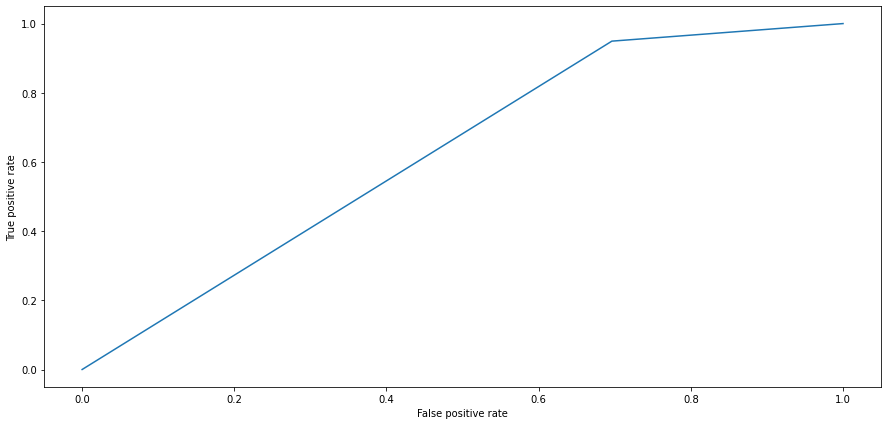

In [ ]:
y = Y
model_prediction_proba = model.predict(good_X)
model_prediction = [0 if i < 0.5 else 1 for i in model_prediction_proba]


confusion_matrix_result = confusion_matrix(y, model_prediction)
print(confusion_matrix_result)

tn, fp, fn, tp = confusion_matrix_result.ravel()
specificity = tn / (tn + fp)
print("Specificity: " + str(specificity))

sensitivity = tp / (tp + fn)
print("Sensitivity: " + str(sensitivity))

PCC = (tn + tp) / (tn + fp + fn + tp)
print("PCC: " + str(PCC))

roc_score = roc_auc_score(y, model_prediction)
print("Rox AUC score: " + str(roc_score))

fpr , tpr , thresholds = roc_curve(y,model_prediction)

fig,ax = plt.subplots(figsize=(15,7))
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax = plt.plot(fpr , tpr , label = 'Roc curve')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 26,753
Trainable params: 26,753
Non-trainable params: 0
_________________________________________________________________


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=77026388-edd3-45ef-90fe-72d2630a8879' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>